In [43]:
import tensorflow as tf

In [44]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np




In [45]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

In [46]:
len(X_train)

60000

In [47]:
len(X_test)

10000

In [48]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [49]:
X_train[0].shape

(28, 28)

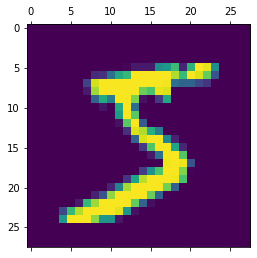

In [50]:
plt.matshow(X_train[0])

In [51]:
Y_train[0]

5

In [52]:
Y_train[:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

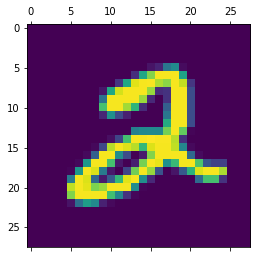

In [53]:
plt.matshow(X_train[5])

In [72]:
#Scaling the datasets
X_train = X_train/255
X_test = X_test/255

#Converting the features into single Matrix
X_train_reshaped = X_train.reshape(len(X_train),28*28)
X_test_reshaped = X_test.reshape(len(X_test),28*28)

In [74]:
X_train_reshaped.shape

(60000, 784)

In [75]:
 model = keras.Sequential([
    keras.layers.Dense(100,input_shape =(784,),activation = 'relu'),
    keras.layers.Dense(100,activation = 'sigmoid')
])

model.compile(optimizer ='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(X_train_reshaped,Y_train,epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3278 - accuracy: 0.9091
Epoch 2/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1373 - accuracy: 0.9594
Epoch 3/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0944 - accuracy: 0.9725


In [76]:
model.evaluate(X_test_reshaped,Y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.0998 - accuracy: 0.9694


[0.09976144134998322, 0.9693999886512756]

In [77]:
y_predicted = model.predict(X_test_reshaped)
y_predicted[0]

313/313 [==============================] - 2s 5ms/step


array([6.54621303e-01, 8.10499419e-04, 9.26241159e-01, 9.98204648e-01,
       2.09271093e-03, 5.59375405e-01, 6.74954481e-06, 9.99994814e-01,
       6.84983790e-01, 8.98685992e-01, 1.22896163e-05, 1.62995493e-05,
       6.16704199e-07, 1.10738765e-04, 5.65645587e-06, 1.28014208e-05,
       5.30718125e-06, 4.14558644e-06, 1.97017489e-05, 3.27018597e-07,
       9.97498591e-06, 1.52292455e-06, 3.77601555e-06, 6.45805073e-07,
       2.07026210e-06, 1.72960404e-06, 1.02723561e-06, 3.54325020e-05,
       1.54275112e-05, 3.62706560e-05, 1.81684863e-05, 2.04461935e-06,
       1.68141542e-05, 3.13007990e-06, 9.46227301e-05, 9.70519159e-06,
       5.26782514e-06, 1.18135858e-05, 2.70683740e-05, 2.11888473e-05,
       4.65090397e-06, 1.22077208e-05, 1.29452046e-05, 8.01861347e-07,
       3.43350530e-06, 1.46695334e-06, 1.62518827e-05, 2.81284315e-06,
       7.90945080e-07, 4.60166775e-05, 1.42220242e-05, 2.31229988e-05,
       5.38700033e-06, 2.24939868e-05, 5.53487598e-06, 4.35059428e-06,
      

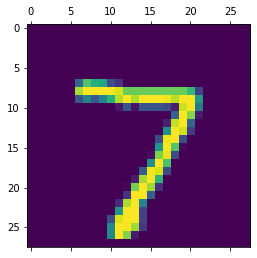

In [89]:
plt.matshow(X_test[0])

In [79]:
np.argmax(y_predicted[0])

7

In [81]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [85]:
cm = tf.math.confusion_matrix(labels = Y_test,predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    0,    2,    0,    0,    0,    2,    2,    0],
       [   0, 1119,    8,    2,    0,    1,    1,    2,    2,    0],
       [   5,    0, 1016,    1,    1,    0,    2,    5,    2,    0],
       [   0,    0,    9,  990,    0,    2,    0,    4,    4,    1],
       [   2,    0,    5,    1,  956,    0,    2,    3,    1,   12],
       [   6,    1,    0,   22,    2,  850,    4,    2,    3,    2],
       [  11,    3,    2,    1,    4,   10,  922,    2,    3,    0],
       [   1,    4,   19,    3,    0,    0,    0,  995,    0,    6],
       [   9,    0,   12,   17,    5,    3,    3,    7,  913,    5],
       [   5,    5,    0,   11,   15,    2,    0,   11,    1,  959]])>

Text(69.0, 0.5, 'Truth')

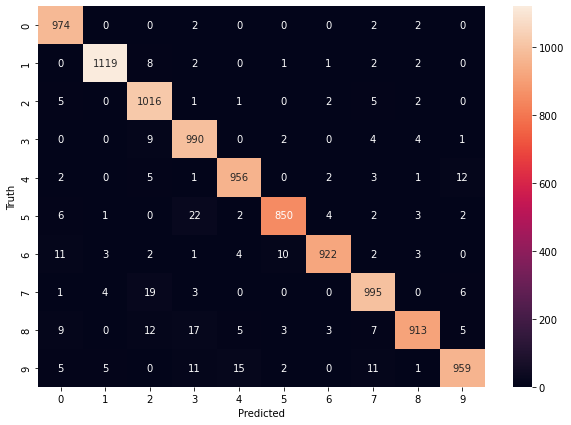

In [88]:
import seaborn as aa
plt.figure(figsize =(10,7))
aa.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')